# Tujuan analisis : Mengetahui sebuah website itu website phising


Phishing adalah suatu bentuk penipuan di mana penyerang mencoba mempelajari informasi sensitif seperti kredensial login atau informasi akun dengan mengirimkannya sebagai entitas atau orang yang memiliki reputasi baik melalui email atau saluran komunikasi lainnya. Biasanya korban menerima pesan yang tampaknya dikirim oleh kontak atau organisasi yang dikenal. Pesan tersebut berisi perangkat lunak berbahaya yang menargetkan komputer pengguna atau memiliki tautan untuk mengarahkan korban ke situs web jahat untuk mengelabui mereka agar membocorkan informasi pribadi dan keuangan, seperti kata sandi, ID akun, atau detail kartu kredit.


Dalam notebook ini kita akan melihat semua fitur apa saja yang bisa kita peroleh dan gunakan dari domain/URL suatu website untuk mendeteksi apakah itu phishing atau bukan.


referensi yang saya gunakan untuk menentukan fitur apa saya yang akan dipakai sebagai berikut :


- pada sebuah paper yang berjudul "Detecting Phishing Websites: A Heuristic-Based Approach" pada link https://www.academia.edu/download/54582278/IRJET-V3I5420.pdf Penelitian ini menjelaskan berbagai heuristik yang digunakan untuk mendeteksi situs phising, pada paper tersebut dijelaskan fitur yang digunakan untuk mendeteksi website pishing itu :


1. Address Bar-based Features (Fitur Berdasarkan Address Bar)
   a. Using the IP Address: Penggunaan alamat IP di URL, bukan nama domain.
   b. Long URL to Hide the Suspicious Part: URL yang sangat panjang.
   c. Using URL Shortening Services: Penggunaan layanan pemendek URL.
   d. URL’s having “@” Symbol: Keberadaan simbol '@' dalam URL.
   e. Redirecting using “//”: Penggunaan "//" di URL setelah protokol.
   f. Adding Prefix or Suffix Separated by (-) to the Domain: Penggunaan tanda hubung dalam domain.
   g. Sub-Domain and Multi Sub-Domains: Jumlah subdomain yang digunakan.
   h. HTTPS (Hyper Text Transfer Protocol with Secure Sockets Layer): Penggunaan atau tidak adanya HTTPS.
   i. Domain Registration Length: Panjang waktu registrasi domain.
   j. Favicon: Penggunaan favicon yang berbeda dari domain utama.
2. Abnormal-based Features (Fitur Abnormal)
   a. Using Non-Standard Port: Penggunaan port non-standar.
   b. HTTPS Token: Keberadaan token HTTPS di domain yang tidak valid.
3. HTML and JavaScript-based Features (Fitur Berdasarkan HTML dan JavaScript)
   a. Request URL: Persentase URL eksternal dalam konten halaman.
   b. URL of Anchor: Persentase link anchor eksternal.
   c. Links in meta, script, and link Tags: Persentase link dalam tag meta, script, dan link.
   d. Server Form Handler (SFH): Penanganan form yang tidak standar.
   e. Submitting Information to Email: Formulir yang mengirimkan data ke email.
   f. Abnormal URL: Ketidaksesuaian antara URL dan konten.
4. Domain-based Features (Fitur Berdasarkan Domain)
   a. Age of Domain: Umur domain.
   b. DNS Record: Ketersediaan rekaman DNS.
   c. Website Traffic: Jumlah traffic ke situs.
   d. PageRank: Ranking halaman di mesin pencari.
   e. Google Index: Keberadaan halaman di indeks Google.
   f. Number of Links Pointing to Page: Jumlah link yang mengarah ke halaman.
   g. Statistical-Reports based Feature: Statistik laporan dari sumber terpercaya tentang domain.


maka dari itu saya mengambil dataset yang berjudul "website pishing" dari https://archive.ics.uci.edu/dataset/379/website+phishing


yang akan digunakan sebagai inputan nanti adalah link website


URL components
Uniform Resource Locator (URL) dibuat untuk mengalamatkan halaman web. Gambar di bawah menunjukkan bagian-bagian yang relevan dalam struktur URL pada umumnya.


phisher mempunyai kendali penuh atas bagian subdomain dan dapat menetapkan nilai apa pun padanya. URL mungkin juga memiliki jalur dan komponen file yang juga dapat diubah oleh phisher sesuka hati. Nama dan jalur subdomain sepenuhnya dapat dikontrol oleh phisher. Kami menggunakan istilah FreeURL untuk merujuk pada bagian URL tersebut di sisa artikel.
Penyerang dapat mendaftarkan nama domain apa pun yang belum pernah didaftarkan sebelumnya. Bagian URL ini hanya dapat disetel satu kali. Phisher dapat mengubah FreeURL kapan saja untuk membuat URL baru. Alasan pembela keamanan kesulitan mendeteksi domain phishing adalah karena bagian unik dari domain situs web (URL Gratis). Ketika sebuah domain terdeteksi sebagai domain palsu, domain ini dapat dicegah dengan mudah sebelum pengguna dapat mengaksesnya.


<img src="uas/image-20240623-124139.png" width="" align="" />


# Memahami data


mari kita lihat fitur apa saja yang ada pada dataset tersebut :


- Server Form Handler (SFH)


SFH yang berisi string kosong atau {{“about:blank”}} dianggap meragukan karena informasi yang disampaikan harus diambil tindakan. Selain itu, jika nama domain di SFH berbeda dengan nama domain halaman web, hal ini menunjukkan bahwa halaman web tersebut mencurigakan karena informasi yang dikirimkan jarang ditangani oleh domain eksternal.


- popUpWindow


Jarang ditemukan situs web sah yang meminta pengguna mengirimkan informasi pribadi mereka melalui jendela pop-up. Di sisi lain, fitur ini telah digunakan di beberapa situs web resmi dan tujuan utamanya adalah untuk memperingatkan pengguna tentang aktivitas penipuan atau menyiarkan pengumuman selamat datang, meskipun tidak ada informasi pribadi yang diminta untuk diisi melalui jendela pop-up ini.


- SSLfinal_State


situs web yang sah dan aman biasanya menggunakan https dibandingkan http


- Request_URL


URL Permintaan memeriksa apakah objek eksternal yang terdapat dalam halaman web seperti gambar, video, dan suara dimuat dari domain lain. Di laman web yang sah, alamat laman web dan sebagian besar objek yang tertanam di laman web berbagi domain yang sama.


- URL_of_Anchor


elemen yang ditentukan oleh tag a. Fitur ini diperlakukan persis seperti “URL Permintaan”. Namun untuk fitur ini kami memeriksa: Jika tag a dan website memiliki nama domain yang berbeda. Ini mirip dengan fitur permintaan URL. Jika jangkar tidak tertaut ke halaman web mana pun, misalnya:


- web_traffic


Fitur ini mengukur popularitas website dengan menentukan jumlah pengunjung dan jumlah halaman yang dikunjungi. Namun, karena situs web phishing aktif dalam jangka waktu singkat, situs tersebut mungkin tidak dikenali oleh database Alexa (Alexa the Web Information Company., 1996). Dengan meninjau kumpulan data kami, kami menemukan bahwa dalam skenario terburuk, situs web sah berada di peringkat 100.000 teratas. Selanjutnya, jika domain tidak memiliki traffic atau tidak dikenali oleh database Alexa, maka diklasifikasikan sebagai “Phishing”. Jika tidak, maka diklasifikasikan sebagai “Mencurigakan”.


- URL_Length


URL Panjang untuk Menyembunyikan Bagian yang Mencurigakan Phisher dapat menggunakan URL panjang untuk menyembunyikan bagian yang meragukan di bilah alamat. Misalnya: http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&amp;dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8 dd4105e8@phishing.website.html Untuk memastikan keakuratan penelitian kami, kami menghitung panjang URL dalam kumpulan data dan menghasilkan panjang URL rata-rata. Hasil penelitian menunjukkan bahwa jika panjang URL lebih besar atau sama dengan 54 karakter maka URL tersebut tergolong phishing. Dengan meninjau kumpulan data kami, kami dapat menemukan 1.220 URL yang panjangnya sama dengan 54 atau lebih yang merupakan 48,8% dari total ukuran kumpulan data. Kami dapat memperbarui aturan fitur ini dengan menggunakan metode berdasarkan frekuensi dan dengan demikian meningkatkan keakuratannya.


- age_of_domain


Fitur ini dapat diambil dari database WHOIS (Whois 2005). Sebagian besar situs web phishing hanya bertahan dalam jangka waktu singkat. Dengan meninjau kumpulan data kami, kami menemukan bahwa usia minimum domain yang sah adalah 6 bulan.


- having_IP_Address


Jika alamat IP digunakan sebagai alternatif nama domain di URL, seperti “http://125.98.3.123/fake.html”, pengguna dapat yakin bahwa seseorang mencoba mencuri informasi pribadinya. Terkadang, alamat IP bahkan diubah menjadi kode heksadesimal seperti yang ditunjukkan pada tautan berikut “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”.


lalu untuk target class dari dataset ini :


- result


RULE IF
1: Website Pishing.
0: Website Mencurigakan.
-1: Website sah.


Cara Pengambilan Data Fitur


1. SFH (Server Form Handler)
   Analisis action URL dari form di halaman web dan membandingkannya dengan domain utama.

2. popUpWindow
   Mendeteksi apakah ada jendela popup saat halaman dimuat menggunakan parsing HTML atau analisis perilaku browser.

3. SSLfinal_State
   Memeriksa status sertifikat SSL dengan menggunakan alat seperti OpenSSL atau library tertentu yang dapat memeriksa validitas SSL.

4. Request_URL
   Menghitung proporsi URL eksternal di dalam halaman web dengan menganalisis konten HTML.

5. URL_of_Anchor
   Menghitung persentase anchor tag yang mengarah ke luar domain utama.

6. web_traffic
   Mengambil informasi peringkat lalu lintas web dari layanan pihak ketiga seperti Alexa atau SimilarWeb.

7. URL_Length
   Mengukur panjang URL dan mengkategorikannya berdasarkan panjang karakter.

8. age_of_domain
   Mengambil informasi usia domain dari WHOIS data.

9. having_IP_Address
   Memeriksa apakah URL menggunakan alamat IP atau nama domain.
   .


## Mengambil data


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline


In [ ]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


- ambil data dari api


In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd


datasets = fetch_ucirepo(id=379) 
X = datasets.data.features
y = datasets.data.targets

X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# # Add an 'ID' column to X_df
# X_df.insert(0, 'ID', X_df.index)

# Concatenate features and targets horizontally
df_main = pd.concat([X_df, y_df], axis=1)

# Display the DataFrame as a table
df_main

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


data ini menggunakan data categorical conctret yang direprentasikan kedalam angka, mari kita lihat apa saja


In [ ]:
for col in df_main.columns:
   unique_value_list = df_main[col].unique()
   if len(unique_value_list) > 10:
      print(f'{col} has {df_main[col].nunique()} unique values')
   else:
      print(f'{col} contains:\t\t\t{unique_value_list}')

SFH contains:			[ 1 -1  0]
popUpWindow contains:			[-1  0  1]
SSLfinal_State contains:			[ 1 -1  0]
Request_URL contains:			[-1  0  1]
URL_of_Anchor contains:			[-1  0  1]
web_traffic contains:			[ 1  0 -1]
URL_Length contains:			[ 1 -1  0]
age_of_domain contains:			[ 1 -1]
having_IP_Address contains:			[0 1]
Result contains:			[ 0  1 -1]


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWindow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [ ]:
df_main.describe()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


   SFH  popUpWindow  SSLfinal_State  Request_URL  URL_of_Anchor  web_traffic  \
0    1           -1               1           -1             -1            1   
1   -1           -1              -1           -1             -1            0   
2    1           -1               0            0             -1            0   
3    1            0               1           -1             -1            0   
4   -1           -1               1           -1              0            0   

   URL_Length  age_of_domain  having_IP_Address Result  
0           1              1                  0      0  
1           1              1                  1      1  
2          -1              1                  0      1  
3           1              1                  0      0  
4          -1              1                  0      1  


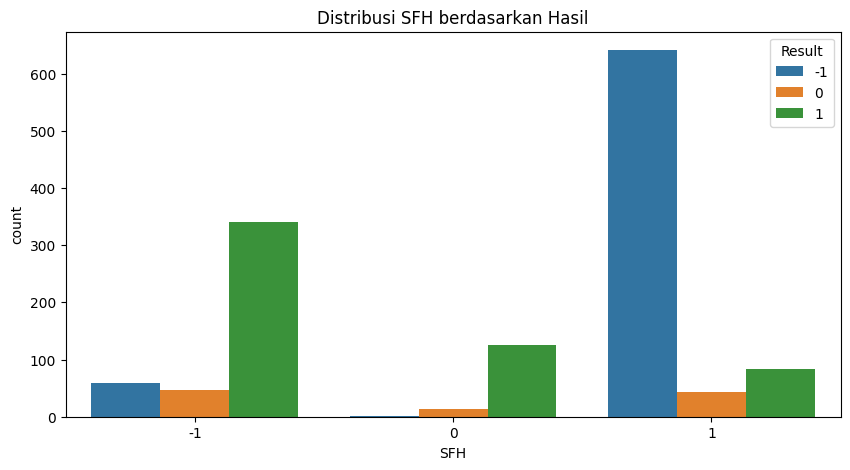

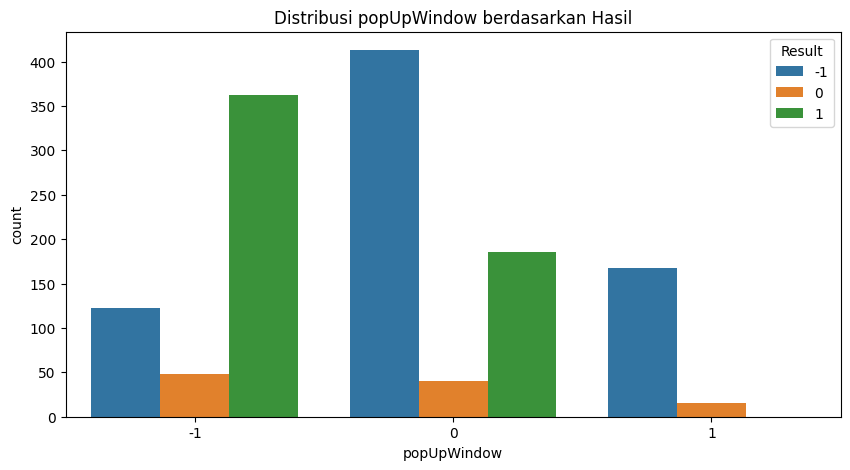

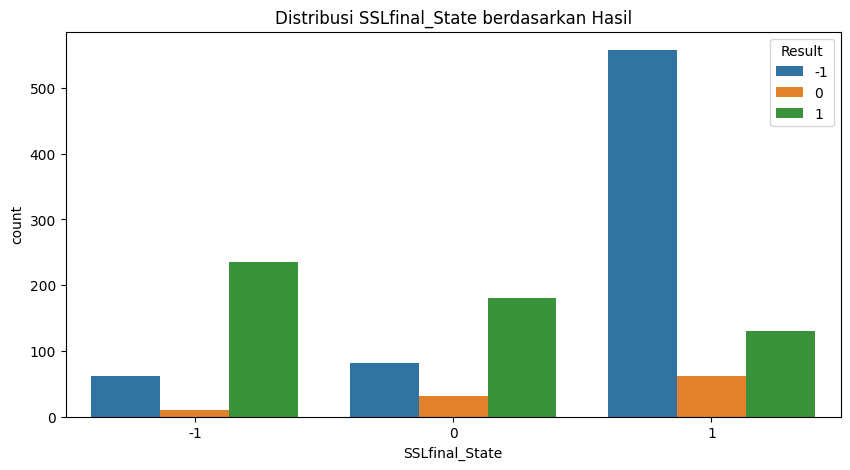

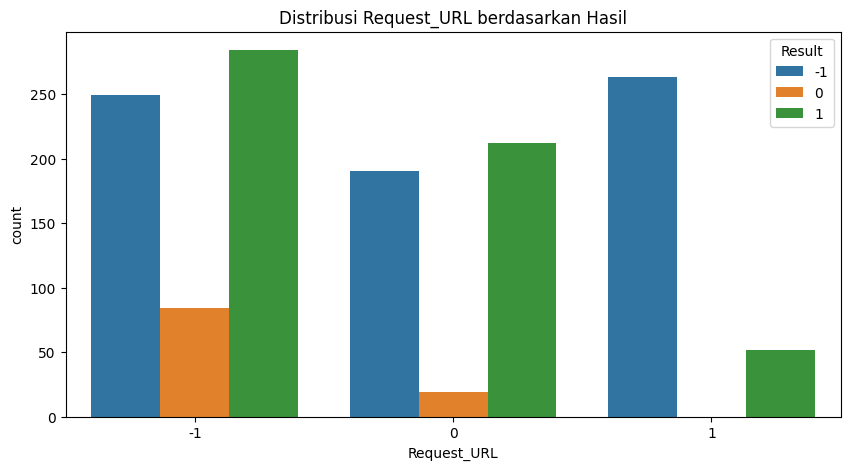

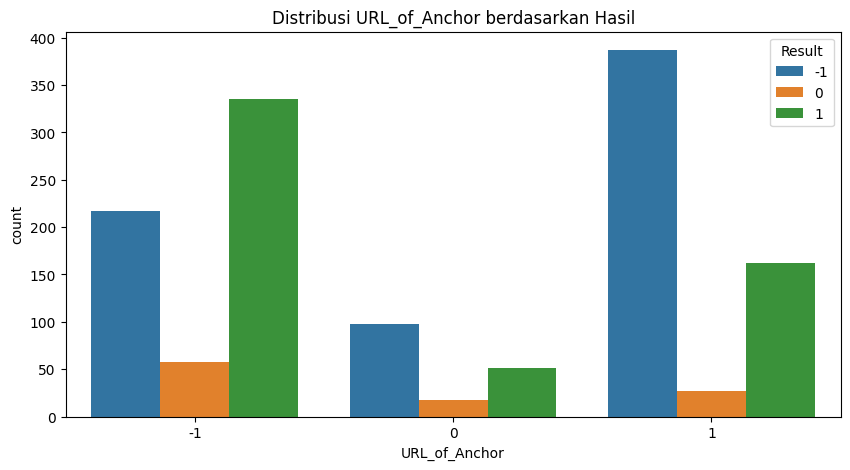

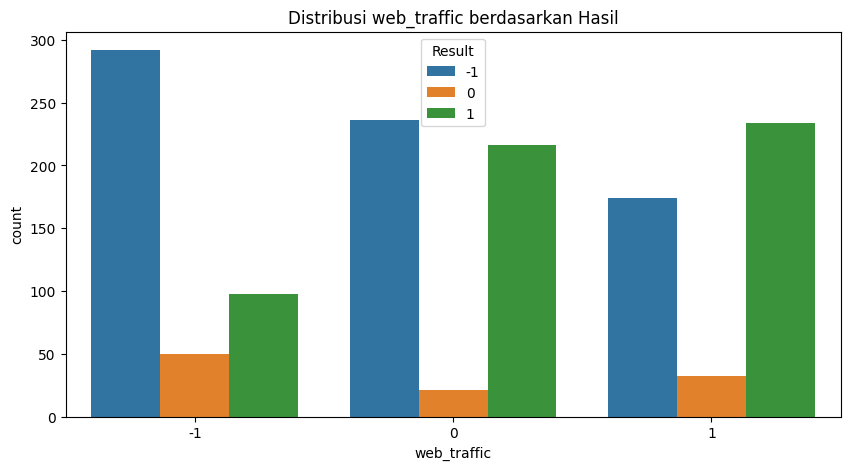

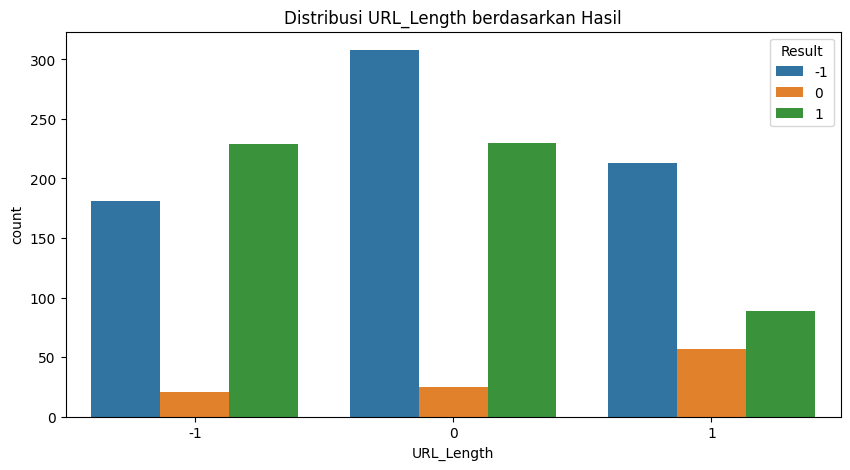

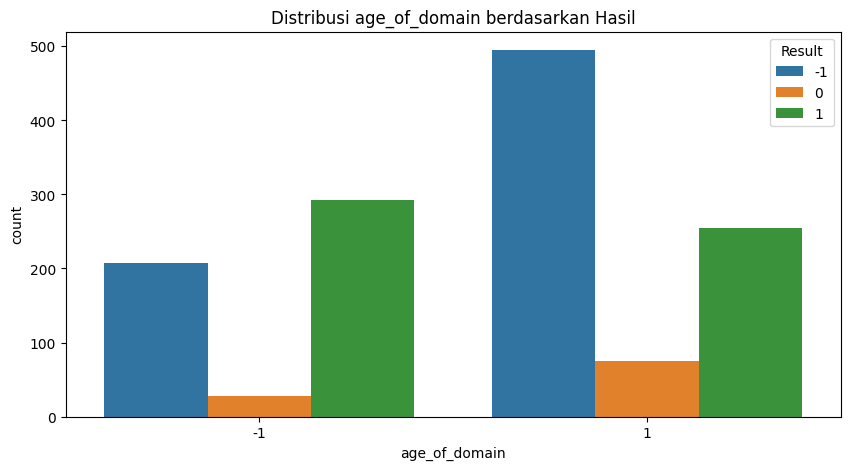

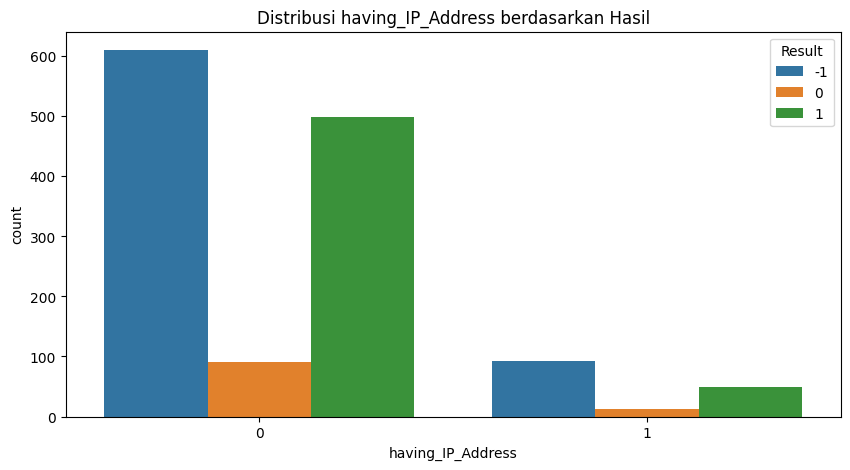

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Mengubah Result menjadi kategori
df_main['Result'] = df_main['Result'].astype('category')

# Menampilkan beberapa baris pertama dari df_main
print(df_main.head())

# Fungsi untuk menampilkan distribusi fitur berdasarkan hasil
def plot_feature_distribution(feature):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Result', data=df_main)
    plt.title(f'Distribusi {feature} berdasarkan Hasil')
    plt.show()

# Daftar fitur yang akan dianalisis
features = ["SFH", "popUpWindow", "SSLfinal_State", "Request_URL", "URL_of_Anchor", "web_traffic", "URL_Length", "age_of_domain", "having_IP_Address"]

# Menampilkan distribusi fitur-fitur
for feature in features:
    plot_feature_distribution(feature)


jadi bisa disimpulkan data ini menggunakan categorical conctret yang direprentasikan kedalam angka dengan value :


Target :

- value 1 = pishing
- value 0 = mencurigakan
- value -1 = website sah


1. SFH (Server Form Handler):

- Jika SFH adalah -1 (phishing) atau 0 (mencurigakan), kemungkinan besar hasilnya adalah 1 atau 0.
- Jika SFH adalah 1, kemungkinan besar hasilnya adalah -1 (sah / tidak pishing).

2. popUpWindow:

- Nilai 1 Tidak ada pop-up yang mencurigakan
- 0: Pop-up netral
- 1: Ada pop-up yang mencurigakan

3. SSLfinal_State:

- 1 SSL sertifikat valid (HTTPS)
- 0 SSL sertifikat netral atau tidak dapat ditentukan
- 1 SSL sertifikat tidak valid atau tidak ada (HTTP)

4. Request_URL:

- 1 URL meminta sumber daya dari domain yang sah
- 0 URL netral
- 1 URL meminta sumber daya dari domain yang mencurigakan

5. URL_of_Anchor:

- 1 Semua anchor URL menuju domain yang sah
- 0 Sebagian anchor URL netral atau tidak dapat ditentukan
- 1 Banyak anchor URL menuju domain yang mencurigakan

6. web_traffic:

- 1 Lalu lintas web tinggi (banyak pengunjung, mengindikasikan situs yang populer)
- 0 Lalu lintas web sedang
- 1 Lalu lintas web rendah (sedikit pengunjung, mengindikasikan situs tidak populer atau baru)

7. URL_Length:

- 1 URL panjang
- 0 URL dengan panjang sedang
- 1 URL pendek

8. age_of_domain:

- 1 Domain telah ada untuk waktu yang lama (lebih dari 6 bulan)
- 1 Domain baru (kurang dari 6 bulan)

9. having_IP_Address:

- 1 URL memiliki alamat IP (biasanya mengindikasikan situs tidak sah atau phishing)
- 0 URL tidak memiliki alamat IP (menggunakan nama domain)


## Kualitas data


### Mengecek keseimbangan data


/tmp/ipykernel_158/2153338152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df_main, palette='viridis')


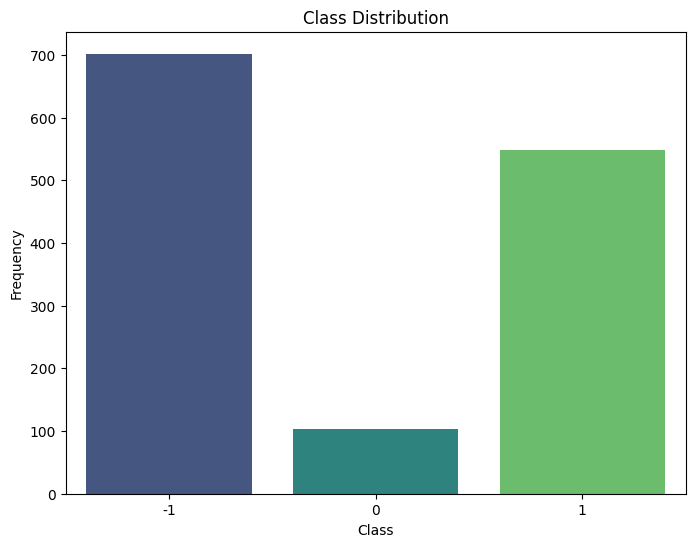

Class Distribution:
 Result
-1    702
1     548
0     103
Name: count, dtype: int64


In [ ]:
class_distribution = df_main['Result'].value_counts()

# Plot distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df_main, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print("Class Distribution:\n", class_distribution)

dari data diatas dataset tidak seimbang karena jumlah sampel untuk kelas 0 (mencurigakan) jauh lebih sedikit dibandingkan dengan kelas -1 (phishing) dan 1 (sah).


Mengapa Keseimbangan Penting?


Keseimbangan dalam dataset penting karena:


- Akurasi yang Bias: Model machine learning cenderung memberikan prediksi yang bias terhadap kelas mayoritas.
  Referensi: "Dealing with Imbalanced Data: An Overview" oleh He dan Garcia (2009) menyebutkan bahwa model akan lebih cenderung mengabaikan kelas minoritas ketika dataset tidak seimbang.


- Evaluasi Model: Metode evaluasi standar seperti akurasi mungkin tidak memberikan gambaran yang benar tentang kinerja model pada kelas minoritas.
  Referensi: "A Survey of Predictive Modelling under Imbalanced Distributions" oleh Krawczyk (2016) menekankan pentingnya menggunakan metrik evaluasi yang memperhitungkan distribusi kelas yang tidak seimbang.


Cara Mengatasi Ketidakseimbangan Data


Ada beberapa teknik untuk mengatasi ketidakseimbangan data:


Resampling:


- Oversampling: Menambah sampel di kelas minoritas.
  Referensi: "Improving the Performance of Minority Class in Classification: A Survey of Algorithms and Applications" oleh Ganganwar (2012).


- Undersampling: Mengurangi sampel di kelas mayoritas.
  Referensi: "An Overview of Class Imbalance Problem: Existing Solutions and New Challenges" oleh Haixiang et al. (2017).


- SMOTE (Synthetic Minority Over-sampling Technique): Menghasilkan sampel sintetis untuk kelas minoritas.
  Menggunakan Metode Evaluasi yang Sesuai:
  Referensi: "SMOTE: Synthetic Minority Over-sampling Technique" oleh Chawla et al. (2002).


Gunakan metrik seperti F1-score, precision, recall, dan ROC-AUC yang lebih informatif dalam situasi data tidak seimbang.
Referensi: "Evaluation Measures for Models Assessment Over Imbalanced Data Sets" oleh Sokolova et al. (2009) membahas pentingnya menggunakan metrik alternatif untuk mengatasi masalah ketidakseimbangan.


Algoritma yang Dirancang untuk Ketidakseimbangan:


- Menggunakan algoritma yang memiliki parameter untuk menangani ketidakseimbangan data seperti class_weight pada beberapa model di Scikit-learn.


- Referensi: "Handling Imbalanced Data: A Case Study for Banking" oleh Abdelrahman dan Wang (2019) menunjukkan bagaimana penggunaan parameter class_weight dapat meningkatkan kinerja model pada data yang tidak seimbang


### Mengecek korelasi antar fitur


<AxesSubplot: >

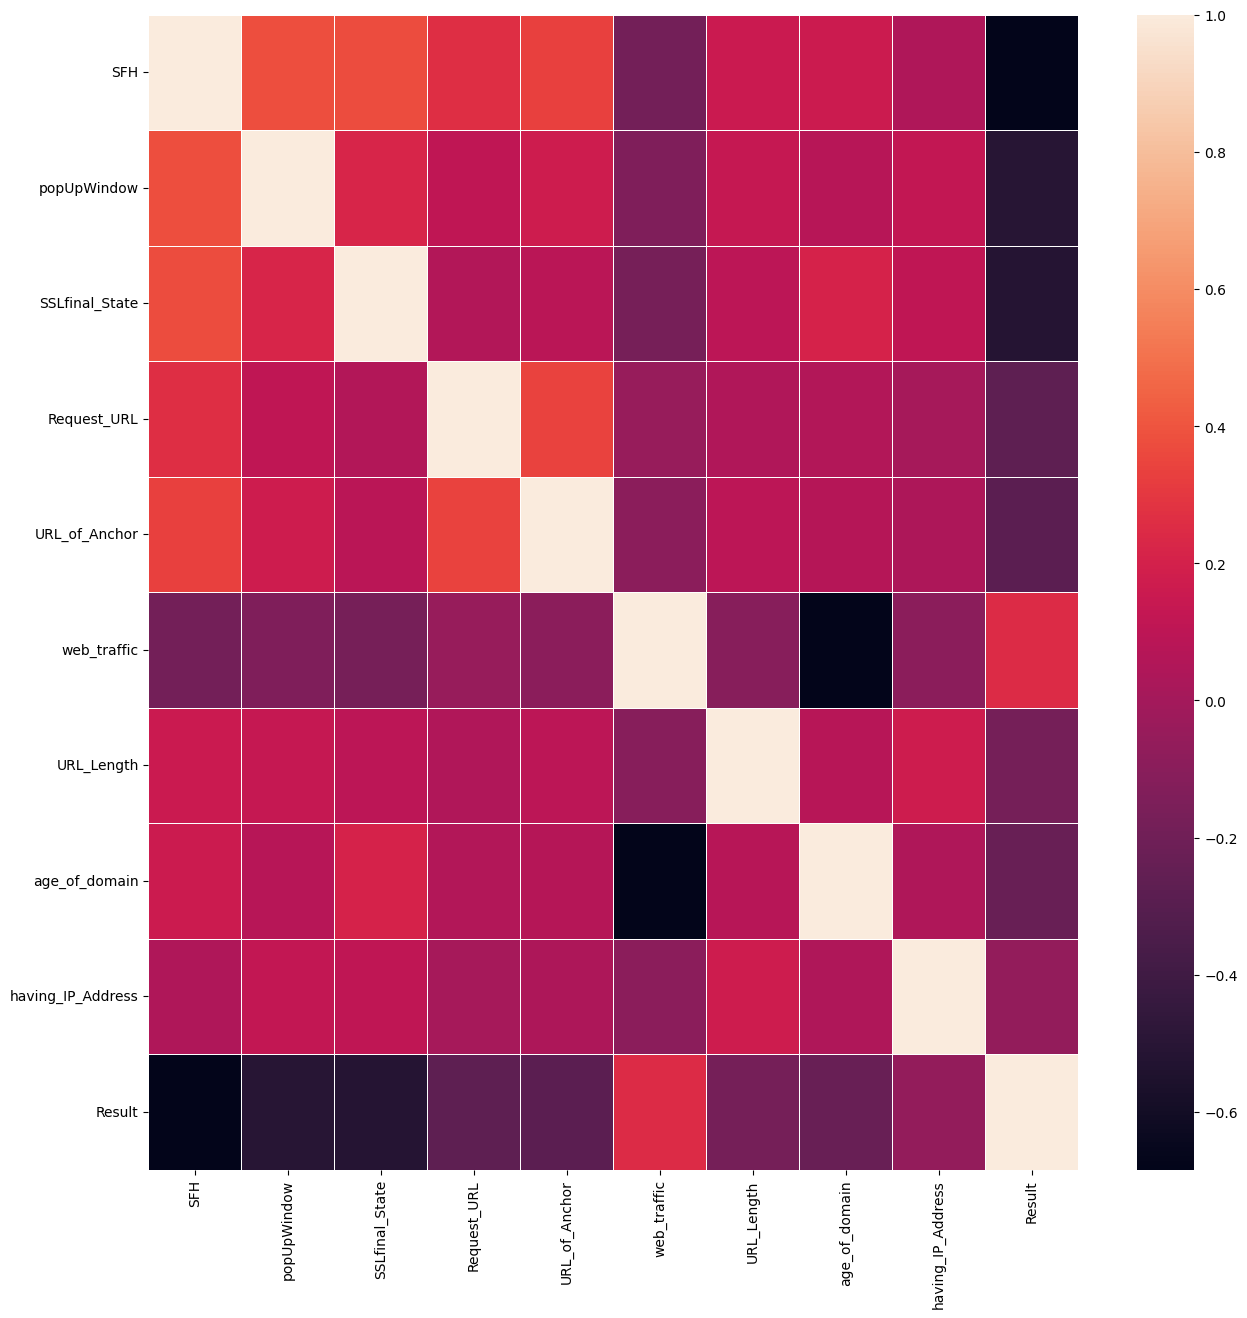

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_main.corr(), linewidths=.5)

jika dilihat pada korelasi antar fitur tidak ada fitur yang terlalu terkait satu sama lain


### Mengecek missing values


In [ ]:
missing_values = df_main.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 SFH                  0
popUpWindow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64


ok sepertinya tidak ada missng value pada dataset ini


### Mencari outlier


Mencari outlier pada data kategorikal diskret tidak semudah pada data numerik kontinu karena tidak ada konsep "jauh dari nilai rata-rata" yang jelas. Namun, ada beberapa metode dan pendekatan yang dapat digunakan untuk mengidentifikasi nilai yang tidak biasa atau tidak sesuai.


Salah satu cara paling sederhana adalah dengan memeriksa frekuensi nilai setiap kategori. Nilai yang muncul sangat jarang dibandingkan dengan nilai lainnya mungkin merupakan outlier.


In [ ]:
for column in df_main.columns:
    print(df_main[column].value_counts())

SFH
 1    767
-1    445
 0    141
Name: count, dtype: int64
popUpWindow
 0    639
-1    532
 1    182
Name: count, dtype: int64
SSLfinal_State
 1    751
-1    308
 0    294
Name: count, dtype: int64
Request_URL
-1    617
 0    421
 1    315
Name: count, dtype: int64
URL_of_Anchor
-1    610
 1    576
 0    167
Name: count, dtype: int64
web_traffic
 0    473
 1    440
-1    440
Name: count, dtype: int64
URL_Length
 0    563
-1    431
 1    359
Name: count, dtype: int64
age_of_domain
 1    825
-1    528
Name: count, dtype: int64
having_IP_Address
0    1198
1     155
Name: count, dtype: int64
Result
-1    702
1     548
0     103
Name: count, dtype: int64


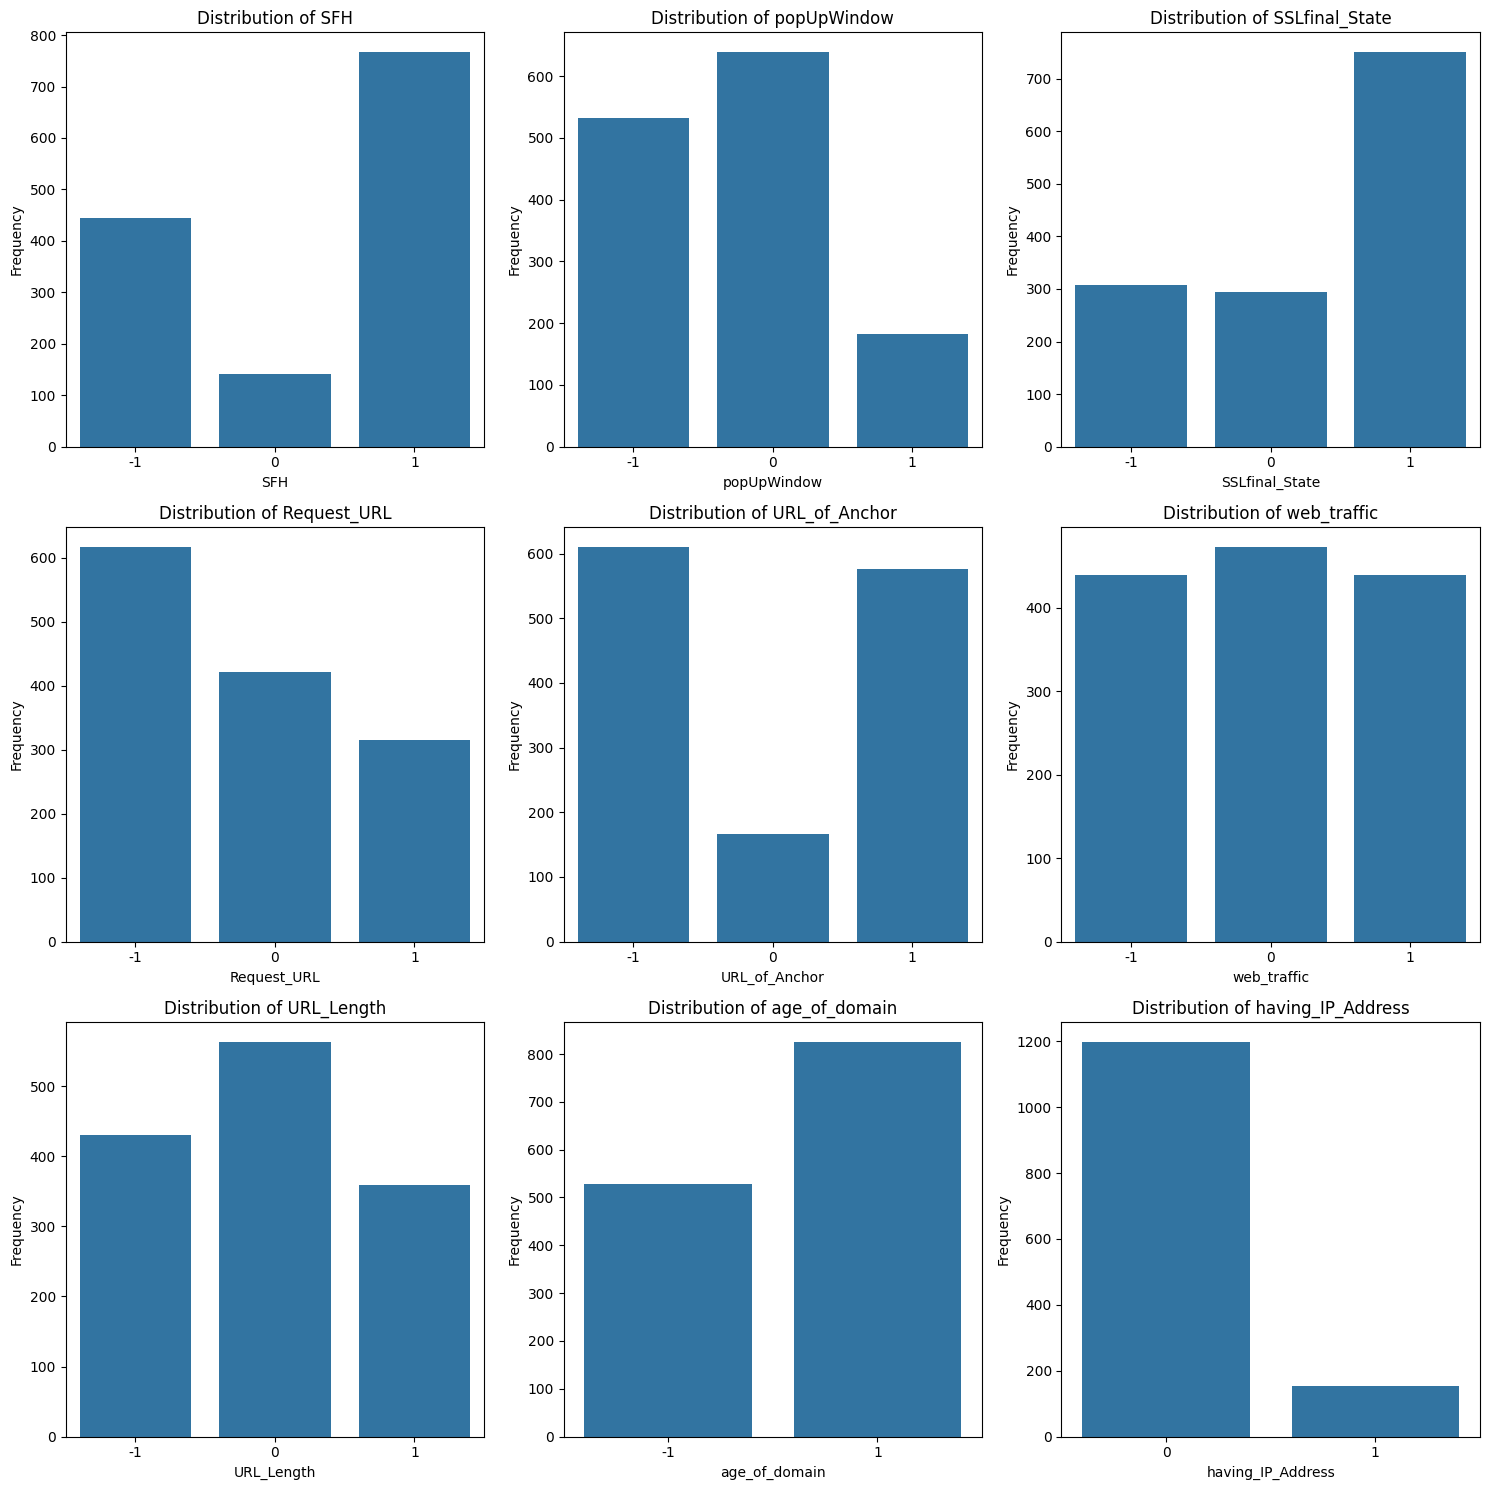

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi untuk setiap fitur
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for idx, col in enumerate(df_main.columns[:-1]):
    sns.countplot(x=df_main[col], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

bisa dilihat pada frekuensi data tidak ada data yang benar benar memiliki nilai value jauh dari rata-rata, maka bisa disimpulkan tidak ada outlier


# Preprocessing data


In [ ]:
pip install imbalanced-learn



[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff

- tidak ada penanganan missing


- tidak ada penaganan outlier


## Penyeimbangan data dengan over-sampling


Apa itu oversampling?
Oversampling adalah teknik augmentasi data yang digunakan untuk mengatasi masalah ketidakseimbangan kelas di mana jumlah satu kelas jauh lebih banyak daripada kelas lainnya. Hal ini bertujuan untuk menyeimbangkan kembali distribusi data pelatihan dengan memperkuat volume instance milik kelas yang kurang terwakili.


Secara khusus, oversampling meningkatkan sampel kelas minoritas melalui replikasi contoh yang ada atau pembuatan titik data sintetik baru . Hal ini dilakukan dengan menduplikasi pengamatan minoritas yang sebenarnya atau membuat penambahan buatan yang meniru pola dunia nyata dalam upaya untuk meratakan frekuensi kelas.


<img src="uas/image-20240621-084300.png" width="" align="" />


Dengan memperkuat kelas-kelas yang kurang terwakili melalui pengambilan sampel yang berlebihan sebelum pelatihan model, pola-pola yang dipelajari secara lebih holistik mewakili semua kategori dibandingkan lebih memilih kategori yang dominan. Hal ini meningkatkan berbagai metrik evaluasi untuk memenuhi kebutuhan yang melibatkan deteksi peristiwa penting namun jarang terjadi.


Mengapa Kita Perlu oversampling?
Saat bekerja dengan kumpulan data yang tidak seimbang, kami biasanya tertarik untuk mengklasifikasikan kelas minoritas dengan benar. Oleh karena itu, dampak negatif palsu (misalnya, kegagalan mendeteksi kelas minoritas) jauh lebih tinggi dibandingkan dampak positif palsu (misalnya, kesalahan mengidentifikasi sampel sebagai anggota kelas minoritas).


Namun, algoritme pembelajaran mesin konvensional, seperti regresi logistik dan hutan acak, bertujuan untuk mengoptimalkan metrik kinerja umum yang mengasumsikan distribusi kelas seimbang. Akibatnya, model yang dilatih dengan data miring cenderung lebih mengutamakan kelas yang lazim, mengabaikan pola pembelajaran yang menunjukkan kelas yang jarang namun penting.


Dengan melakukan pengambilan sampel secara berlebihan pada contoh kelas minoritas, kumpulan data diseimbangkan kembali untuk mencerminkan biaya kesalahan klasifikasi yang lebih setara di semua hasil. Hal ini memastikan pengklasifikasi dapat mengidentifikasi dengan tepat kategori yang kurang terwakili dengan akurasi yang lebih tinggi dan mengurangi negatif palsu yang memakan banyak biaya.


referensi https://medium.com/@abdallahashraf90x/oversampling-for-better-machine-learning-with-imbalanced-data-68f9b5ac2696


langkah -langkah oversampling secara teori


1. Identifikasi Kelas Minoritas dan Mayoritas:

   - Hitung jumlah sampel dalam setiap kelas.
   - Tentukan kelas minoritas (kelas dengan jumlah sampel lebih sedikit) dan kelas mayoritas (kelas dengan jumlah sampel lebih banyak).

2. Oversampling Kelas Minoritas:
   - Tambahkan salinan dari sampel kelas minoritas secara acak hingga jumlahnya sama dengan kelas mayoritas.
   - Setiap sampel dalam kelas minoritas dapat dipilih beberapa kali untuk ditambahkan kembali ke dataset.


kekurangan dan kelebihan


1. Keuntungan:

   - Sederhana dan mudah diimplementasikan.
   - Mengurangi bias yang disebabkan oleh kelas mayoritas yang dominan.

2. Kelemahan:
   - Dapat menyebabkan overfitting karena duplikasi sampel yang sama.
   - Tidak menambah informasi baru, hanya menambah jumlah sampel.


disini kita akan menggunakan random over sampling dan smote untuk pebandingan


Random oversampling adalah teknik langsung yang menduplikasi contoh kelas minoritas secara acak untuk menyeimbangkan distribusi kelas.


Ini memilih contoh yang ada dari kategori yang kurang terwakili secara acak dan mereplikasinya tanpa perubahan. Hal ini mempunyai keuntungan dalam meningkatkan pengamatan minoritas secara efisien ketika kumpulan data berukuran kecil tanpa memerlukan pengumpulan data tambahan di dunia nyata.


<img src="uas/image-20240621-085645.png" width="" align="" />


- Penyeimbangan dataset dengan metode random over-sampling menggunakan library imblearn


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Menggunakan RandomOverSampler untuk menyeimbangkan data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Membuat DataFrame hasil resampling
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Result'] = y_resampled


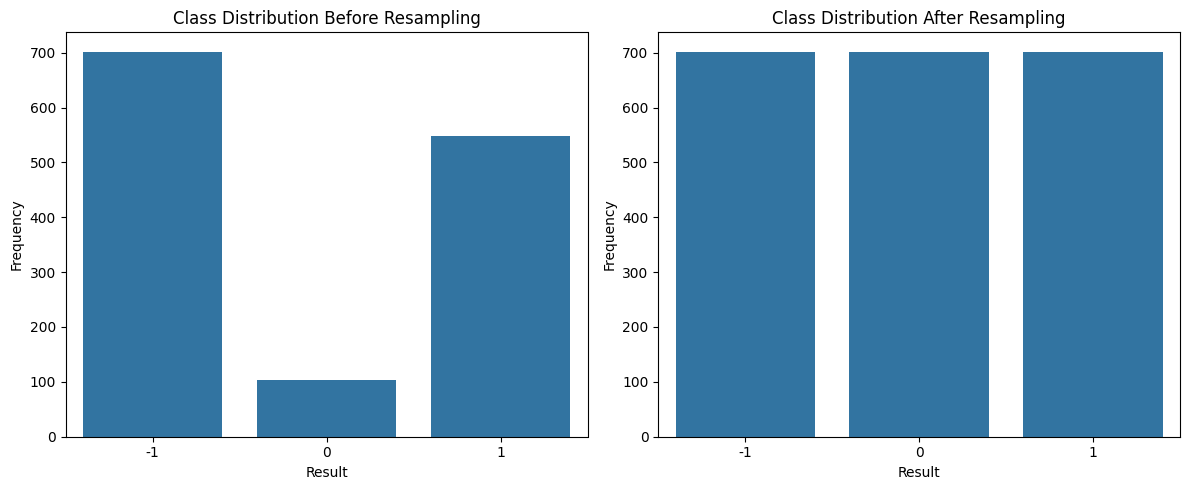

In [ ]:

# Distribusi data sebelum resampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Result', data=df_main)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Result')
plt.ylabel('Frequency')

# Distribusi data setelah resampling
plt.subplot(1, 2, 2)
sns.countplot(x='Result', data=resampled_df)
plt.title('Class Distribution After Resampling')
plt.xlabel('Result')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
resampled_df

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2101,0,0,-1,0,1,1,0,-1,0,1
2102,1,-1,0,-1,0,0,-1,-1,0,1
2103,-1,-1,0,0,-1,1,-1,-1,0,1
2104,-1,0,0,0,-1,1,-1,-1,0,1


penggunaan RandomOverSampler memang dapat menyebabkan banyak data duplikat karena teknik ini menghasilkan sampel baru dengan menyalin (menggandakan) data dari kelas minoritas. Pengaruh data duplikat pada akurasi dan performa model bisa bermacam-macam tergantung pada jenis model yang digunakan dan kompleksitas dataset.


- Penyeimbangan dataset dengan metode SMOTE over-sampling menggunakan library imblearn


SMOTE (Synthetic Minority Over-sampling Technique): Teknik ini menciptakan sampel baru dengan interpolasi antara sampel minoritas yang ada. Ini mengurangi kemungkinan overfitting karena tidak hanya menggandakan sampel yang sudah ada tetapi juga menciptakan sampel baru yang unik.


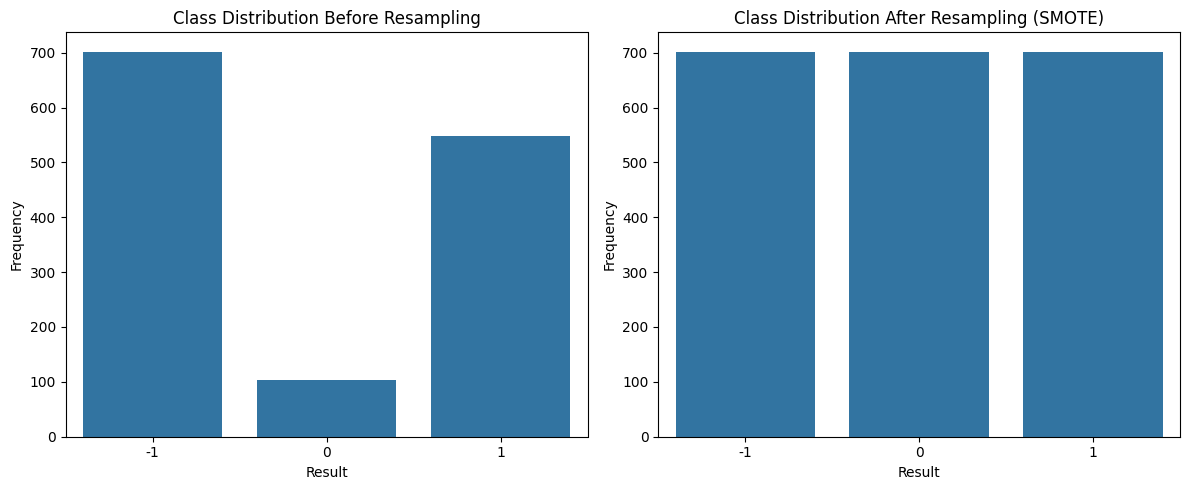

   SFH  popUpWindow  SSLfinal_State  Request_URL  URL_of_Anchor  web_traffic  \
0    1           -1               1           -1             -1            1   
1   -1           -1              -1           -1             -1            0   
2    1           -1               0            0             -1            0   
3    1            0               1           -1             -1            0   
4   -1           -1               1           -1              0            0   

   URL_Length  age_of_domain  having_IP_Address  Result  
0           1              1                  0       0  
1           1              1                  1       1  
2          -1              1                  0       1  
3           1              1                  0       0  
4          -1              1                  0       1  


In [ ]:
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Membuat DataFrame hasil resampling
SMOTE_df = pd.DataFrame(X_resampled, columns=X.columns)
SMOTE_df['Result'] = y_resampled

# Menampilkan distribusi data sebelum dan setelah resampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Result', data=df_main)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Result')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='Result', data=SMOTE_df)
plt.title('Class Distribution After Resampling (SMOTE)')
plt.xlabel('Result')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Menampilkan beberapa baris data setelah oversampling
print(SMOTE_df.head())


# Data Modelling


Pada bagian ini akan dilakukan perhitungan pada data testing menggunakan model KNN dan RandomForest


Menurut referensi pada buku berjudul "Data Mining Concept and Techniques" edisi ketiga pada link : link : The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann


“Bagaimana cara kerja klasifikasi?” Klasifikasi data merupakan proses dua langkah, yang terdiri dari langkah pembelajaran (di mana model klasifikasi dibangun) dan langkah klasifikasi (di mana model digunakan untuk memprediksi label kelas untuk data tertentu). Prosesnya ditunjukkan untuk data pengajuan pinjaman


<img src="uas/image-20240529-205207-20240623-051648.png" width="" align="" />


konsep akurasi model


Menggunakan data training untuk mendapatkan pengklasifikasi dan kemudian memperkirakan keakuratan model pembelajaran yang dihasilkan dapat mengakibatkan perkiraan terlalu optimistis yang menyesatkan karena terlalu mengkhususkan algoritma pembelajaran pada data. Sebaliknya, lebih baik mengukur keakuratan pengklasifikasi pada set pengujian yang terdiri dari tupel berlabel kelas yang tidak digunakan untuk melatih model.


Menurut referensi pada buku berjudul "Data Mining Concept and Techniques" edisi ketiga pada link : link : The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann


$$\Huge accuracy = \frac{TP + TN}{P + N}$$


maka kita bisa menggunakan confusion matrix seperti berikut


<img src="uas/image-20240529-211947-20240626-121642.png" width="" align="" />


<img src="uas/image-20240529-212506-20240626-122752.png" width="" align="" />


## Membuat model dengan Knn


Algoritma kNN dapat dianggap sebagai sistem pemungutan suara, di mana label kelas mayoritas menentukan label kelas dari titik data baru di antara tetangga terdekatnya 'k' (di mana k adalah bilangan bulat) di ruang fitur. Bayangkan sebuah desa kecil dengan beberapa ratus penduduk, dan Anda harus memutuskan partai politik mana yang harus Anda pilih. Untuk melakukan ini, Anda dapat pergi ke tetangga terdekat Anda dan menanyakan partai politik mana yang mereka dukung. Jika mayoritas tetangga terdekat Anda 'k' mendukung partai A, maka kemungkinan besar Anda juga akan memilih partai A. Ini mirip dengan cara kerja algoritma kNN, di mana label kelas mayoritas menentukan label kelas dari titik data baru di antara tetangga terdekatnya k.


Mari kita lihat lebih dalam dengan contoh lain. Bayangkan Anda memiliki data tentang buah, khususnya anggur dan pir. Anda memiliki skor untuk mengetahui seberapa bulat buah dan diameternya. Anda memutuskan untuk memplotnya pada grafik. Jika seseorang memberi Anda buah baru, Anda juga dapat memplotnya pada grafik, lalu mengukur jarak ke k (bilangan) titik terdekat untuk menentukan buah apa itu. Pada contoh di bawah, jika kita memilih untuk mengukur tiga titik, kita dapat mengatakan bahwa tiga titik terdekat adalah buah pir, jadi saya yakin 100% bahwa ini adalah buah pir. Jika kita memilih untuk mengukur empat titik terdekat, tiga adalah buah pir dan satu buah anggur, maka kita dapat mengatakan bahwa kita 75% yakin ini adalah buah pir. Kami akan membahas cara menemukan nilai terbaik untuk k dan berbagai cara mengukur jarak nanti di artikel ini.


Cara Kerja Algoritma KNN


Algoritma KNN menghitung jarak dari data uji ke setiap baris data pelatihan.
Jarak dapat dihitung dengan menggunakan jarak Euclidean, Manhattan, Hamming distance, atau Minkowski distance. Umumnya, jarak Euclidean digunakan.
Jarak tersebut kemudian diurutkan dalam urutan menaik dari mana nilai K teratas dipilih.
Berdasarkan mayoritas kelas, klasifikasi dilakukan terhadap data tes.


<img src="uas/image-20240626-194229.png" width="" align="" />


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = resampled_df.drop('Result', axis=1)
y = resampled_df['Result']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.86      0.89       138
           0       0.88      1.00      0.94       141
           1       0.93      0.87      0.90       143

    accuracy                           0.91       422
   macro avg       0.91      0.91      0.91       422
weighted avg       0.91      0.91      0.91       422

Akurasi KNN: 91.00%


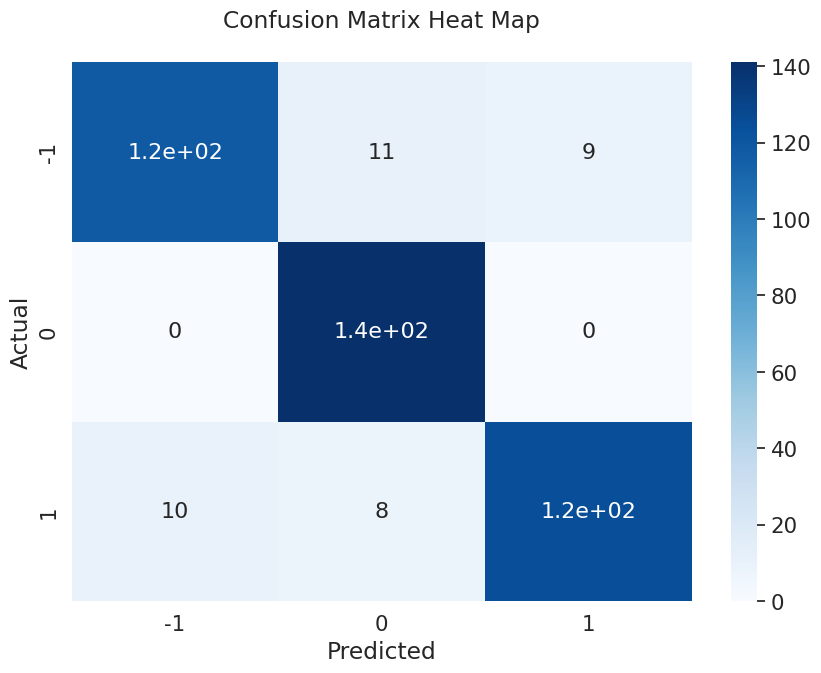

In [ ]:
# Inisialisasi model KNN dengan jumlah tetangga k = 40
knn_model = KNeighborsClassifier(n_neighbors=40, p=2, weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Hitung akurasi
accuracy_knn = accuracy_score(y_pred_knn, y_test)
report = classification_report(y_test, y_pred_knn)
matrix = confusion_matrix(y_test, y_pred_knn)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix', dpi=300, bbox_inches='tight')

print(f'Accuracy: {accuracy_knn:.2f}')
print(f'Classification Report:\n{report}')
print(f'Akurasi KNN: {accuracy_knn:.2%}')

Penjelasan Metrik :
Precision: Ketepatan model dalam mengklasifikasikan sampel untuk setiap kelas.
Recall: Kemampuan model dalam menangkap semua sampel yang sebenarnya ada di setiap kelas.
F1-Score: Rata-rata harmonis dari precision dan recall.


## Membuat model dengan random forest classifier


konsep random forest classification


konsep random forest classification membuat sekumpulan pohon keputusan dari subset set pelatihan yang dipilih secara acak. Ini adalah sekumpulan pohon keputusan (DT) dari subset set pelatihan yang dipilih secara acak dan kemudian mengumpulkan suara dari pohon keputusan yang berbeda untuk menentukan prediksi akhir.


<img src="uas/image-20240626-194516.png" width="" align="" />


Intuisi algoritma random forest dapat dibagi menjadi dua tahap.


Pada tahap pertama, kami memilih secara acak “k” fitur dari total m fitur dan membangun hutan acak. Pada tahap pertama, kami melanjutkan sebagai berikut: -


- Pilih secara acak k fitur dari total m fitur dengan k < m.


- Di antara fitur k, hitung node d menggunakan titik pisah terbaik.


- Pisahkan node menjadi node anak menggunakan pemisahan terbaik.


- Ulangi 1 hingga 3 langkah hingga l jumlah node tercapai.


- Bangun hutan dengan mengulangi langkah 1 hingga 4 sebanyak n kali untuk menghasilkan n jumlah pohon.


Pada tahap kedua, kami membuat prediksi menggunakan algoritma random forest yang telah dilatih.


- Kami mengambil fitur pengujian dan menggunakan aturan dari setiap pohon keputusan yang dibuat secara acak untuk memprediksi hasil dan


- menyimpan hasil yang diprediksi.


- Kemudian, kami menghitung suara untuk setiap target yang diprediksi.


- Terakhir, kami menganggap target prediksi dengan suara terbanyak sebagai prediksi akhir dari algoritma random forest.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = resampled_df.drop('Result', axis=1)
y = resampled_df['Result']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(random_state=42)

# Melatih model pada data latih
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       138
           0       0.97      1.00      0.98       141
           1       0.93      0.94      0.93       143

    accuracy                           0.95       422
   macro avg       0.95      0.95      0.94       422
weighted avg       0.95      0.95      0.95       422



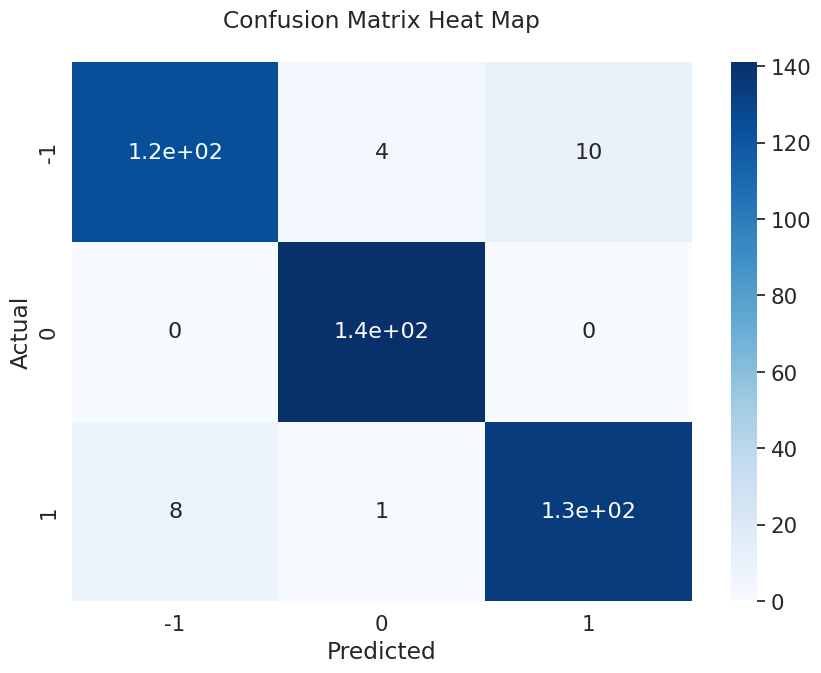

In [ ]:
# Melakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix', dpi=300, bbox_inches='tight')

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')
# print(f'Confusion Matrix:\n{matrix}')


# Conclussion


dari beberapa model yang telah dibuatn didapatkan akurasi sebagai berikut :


| Model         | Akurasi |
| ------------- | ------- |
| KNN           | 0.91    |
| Random Forest | 0.95    |


maka dari itu dari hasil deepnote ini akan menggunakan model randomforest sebagai prediksi


# Deployement test


In [ ]:
import pickle
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [ ]:
rf_model_load = pickle.load(open('rf_model.sav', 'rb'))

pertama kita perlu encoder untuk mengekstrak fitur yang dibutuhkan di url


In [ ]:
pip install python-whois


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 17.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
from bs4 import BeautifulSoup
import tldextract
import re
import whois
import datetime
from joblib import load
import numpy as np


# Fungsi untuk mengecek HTTPS
def check_https(url):
    return 1 if url.startswith("https://") else -1

# Fungsi untuk mengecek panjang URL
def check_url_length(url):
    return 1 if len(url) >= 54 else (-1 if len(url) <= 7 else 0)

# Fungsi untuk mengecek IP Address di URL
def check_ip_in_url(url):
    return 1 if re.match(r'http[s]?://(?:[0-9]{1,3}\.){3}[0-9]{1,3}', url) else 0

# Fungsi untuk mengecek age of domain
def check_age_of_domain(url):
    domain_info = whois.whois(url)
    creation_date = domain_info.creation_date
    if isinstance(creation_date, list):
        creation_date = creation_date[0]
    age = (datetime.datetime.now() - creation_date).days
    return 1 if age >= 180 else -1

# Fungsi untuk memeriksa apakah form handler sesuai
def check_sfh(url, soup):
    forms = soup.find_all('form')
    for form in forms:
        action = form.get('action')
        if action:
            domain = tldextract.extract(url).domain
            action_domain = tldextract.extract(action).domain
            if action_domain and domain != action_domain:
                return -1
    return 1

# Fungsi untuk memeriksa adanya pop-up
def check_pop_up(soup):
    scripts = soup.find_all('script')
    for script in scripts:
        if "window.open" in script.text:
            return -1
    return 1

# Fungsi untuk memeriksa Request_URL
def check_request_url(url, soup):
    domain = tldextract.extract(url).domain
    requests = soup.find_all(['img', 'audio', 'embed', 'iframe'])
    for request in requests:
        src = request.get('src')
        if src:
            request_domain = tldextract.extract(src).domain
            if request_domain and request_domain != domain:
                return -1
    return 1

# Fungsi untuk memeriksa URL of Anchor
def check_url_of_anchor(url, soup):
    domain = tldextract.extract(url).domain
    anchors = soup.find_all('a', href=True)
    total = len(anchors)
    suspicious = 0
    for anchor in anchors:
        href = anchor['href']
        anchor_domain = tldextract.extract(href).domain
        if anchor_domain and anchor_domain != domain:
            suspicious += 1
    if total > 0:
        ratio = suspicious / total
        if ratio < 0.31:
            return 1
        elif ratio < 0.67:
            return 0
        else:
            return -1
    return 1

# Fungsi untuk memeriksa web traffic (data fiktif)
def check_web_traffic():
    # Implementasi dengan API eksternal seharusnya dilakukan di sini
    # Contoh data fiktif
    traffic = 50000
    return 1 if traffic > 100000 else (0 if traffic > 10000 else -1)

# Fungsi utama untuk mengekstrak fitur dari URL
def extract_features(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    sfh_status = check_sfh(url, soup)
    pop_up_status = check_pop_up(soup)
    ssl_status = check_https(url)
    request_url_status = check_request_url(url, soup)
    url_of_anchor_status = check_url_of_anchor(url, soup)
    web_traffic_status = check_web_traffic()
    url_length = check_url_length(url)
    age_of_domain = check_age_of_domain(url)
    ip_in_url = check_ip_in_url(url)
    
    return np.array([sfh_status, pop_up_status, ssl_status, request_url_status, url_of_anchor_status, web_traffic_status, url_length, age_of_domain, ip_in_url]).reshape(1, -1)



In [ ]:

url = "https://shopee.co.id/Elektronik-cat"


# Ekstraksi fitur
features = extract_features(url)

# Prediksi menggunakan model
prediction = rf_model_load.predict(features)

print(f"Prediction: {prediction[0]}")



# Interpretasi hasil prediksi
if prediction == 1:
    print("URL ini adalah Website Phishing.")
elif prediction == 0:
    print("URL ini adalah Website Mencurigakan.")
elif prediction == -1:
    print("URL ini adalah Website Bukan Pishing.")
else:
    print("Prediksi tidak dikenal.")

Prediction: -1
URL ini adalah Website Bukan Pishing.
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
prediction = rf_model_load.predict([[-1,-1,-1,-1,-1,0,1,1,1]])

prediction

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8580c980-9951-40c3-a954-04eac19e4351' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>
